In [130]:
# Load the important library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
df = pd.read_csv('Social_Network_Ads.csv')

In [133]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [135]:
X = df.drop('Purchased',axis = 1)

y = df.pop('Purchased')

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25, random_state = 0)

In [137]:
print('Shape of the X_train data set {}'.format(X_train.shape), 
     'Shape of the X_test data set {}'.format(X_test.shape))

Shape of the X_train data set (300, 2) Shape of the X_test data set (100, 2)


In [138]:
print('Shape of the X_train data set {}'.format(X_train.shape), 
     'Shape of the X_test data set {}'.format(X_test.shape))

Shape of the X_train data set (300, 2) Shape of the X_test data set (100, 2)


In [139]:
rfcl = RandomForestClassifier(n_estimators=501,  
                              oob_score=True, 
                              max_depth = 20, 
                              max_features = 2, 
                              min_samples_leaf = 15,
                             min_samples_split = 30)

n_estimator for choose number of trees in the forest,

oob_score- out of bag score

max_depth - The maximum depth of tree.

In [140]:
rfcl = rfcl.fit(X_train,y_train)

In [141]:
rfcl.oob_score

True

In [142]:
rfcl.oob_score_

0.9033333333333333

 While using the cross-validation technique, every validation set has already been seen or used in training by a few decision trees and hence there is a leakage of data, therefore more variance.
But, OOB_Score prevents leakage and gives a better model with low variance, so we use OOB_score for validating the model.

error = 100-88 = 12% error


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {'max_depth': [10,20],
              'max_features' : [1,2],
              'min_samples_leaf' : [10,15],
              'min_samples_split' : [20,30],
             'n_estimators' : [401,501]}

In [145]:
rfcl1 = RandomForestClassifier()

In [146]:
grid_search = GridSearchCV(estimator = rfcl1, param_grid = param_grid, cv =3)

In [147]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'max_features': [1, 2],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [20, 30],
                         'n_estimators': [401, 501]})

In [148]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'max_features': [1, 2],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [20, 30],
                         'n_estimators': [401, 501]})

In [149]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 401}

In [150]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=401)

In [151]:
best_grid = grid_search.best_estimator_

In [152]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [153]:
# for probability
ytrain_predict_proba = best_grid.predict_proba(X_train)
ytest_predict_proba = best_grid.predict_proba(X_test)

In [154]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [155]:
confusion_matrix(y_train, ytrain_predict)

array([[170,  19],
       [  6, 105]], dtype=int64)

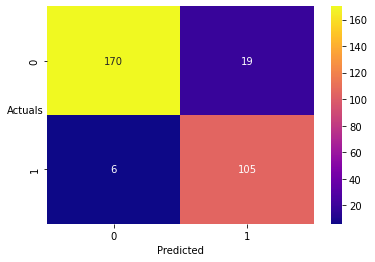

In [156]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

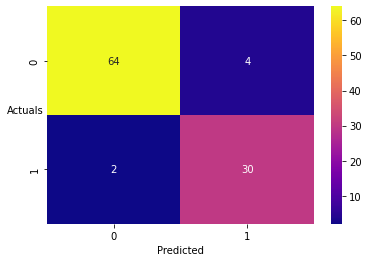

In [157]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [158]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       189
           1       0.85      0.95      0.89       111

    accuracy                           0.92       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.92      0.92       300



In [159]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [160]:
probs = best_grid.predict_proba(X_train)

In [161]:
probs = probs[:,1]

In [162]:
from sklearn.metrics import roc_auc_score

In [163]:
auc = roc_auc_score(y_train, probs)

In [164]:
auc

0.9715668049001381

AUC: 0.972


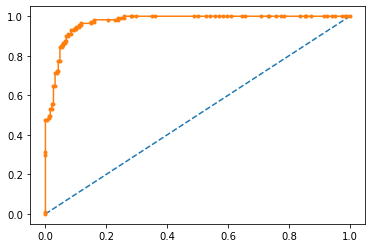

In [165]:
# Predict Probabilities
probs = best_grid.predict_proba(X_train)

# Keep probabilities for the positive outcome only
probs = probs[:,1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
auc= roc_auc_score(y_train, probs)
print('AUC: %.3f'%auc)
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr,tpr,marker = '.')
plt.show()

AUC: 0.985


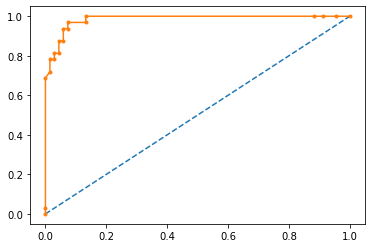

In [166]:
# Predict Probabilities
probs = best_grid.predict_proba(X_test)

# Keep probabilities for the positive outcome only
probs = probs[:,1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
auc= roc_auc_score(y_test, probs)
print('AUC: %.3f'%auc)

#Calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve (y_test, probs)
plt.plot([0,1],[0,1], linestyle ='--')

# Plot the roc curve for the model
plt.plot(fpr,tpr, marker = '.')

#Show the plot
plt.show()

In [178]:
print(rfcl.predict([[58,87000]]))

[1]
